In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', None)
#pd.set_option('max_colwidth', -1)

In [2]:
df = pd.read_csv('deliveries.csv')

In [3]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [4]:
df.inning.unique()

array([1, 2, 3, 4, 5, 6])

In [5]:
df = df[(df.inning==1) | (df.inning==2)]

In [6]:
df.inning.unique()

array([1, 2])

In [7]:
df.bowling_team.unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Chennai Super Kings', 'Delhi Daredevils',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [8]:
df[df.bowling_team == 'Mumbai Indians']['bowler'].unique()

array(['A Nehra', 'SM Pollock', 'DS Kulkarni', 'ST Jayasuriya',
       'Harbhajan Singh', 'AM Nayar', 'DJ Bravo', 'VS Yeligati',
       'MA Khote', 'SD Chitnis', 'CRD Fernando', 'DJ Thornely', 'RR Raje',
       'DR Smith', 'A Nel', 'SL Malinga', 'Z Khan', 'SR Tendulkar',
       'JP Duminy', 'GR Napier', 'C Nanda', 'AM Rahane', 'RA Shaikh',
       'R McLaren', 'AG Murtaza', 'R Sathish', 'KA Pollard', 'AN Ahmed',
       'STR Binny', 'MM Patel', 'JEC Franklin', 'RG Sharma', 'TL Suman',
       'A Symonds', 'RW Price', 'PP Ojha', 'RP Singh', 'CJ McKay',
       'NLTC Perera', 'RJ Peterson', 'R Shukla', 'MG Johnson',
       'JJ Bumrah', 'JDP Oram', 'R Dhawan', 'YS Chahal', 'P Suyal',
       'GJ Maxwell', 'NM Coulter-Nile', 'CJ Anderson', 'P Kumar',
       'LMP Simmons', 'K Santokie', 'S Gopal', 'M de Lange',
       'R Vinay Kumar', 'J Suchith', 'MJ McClenaghan', 'HH Pandya',
       'TG Southee', 'KH Pandya', 'N Rana', 'KV Sharma',
       'Mustafizur Rahman', 'M Markande', 'PJ Sangwan', 'BCJ C

In [9]:
df[df.batting_team == 'Royal Challengers Bangalore']['batter'].unique()

array(['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis', 'CL White',
       'MV Boucher', 'B Akhil', 'AA Noffke', 'P Kumar', 'Z Khan',
       'SB Joshi', 'S Chanderpaul', 'LRPL Taylor', 'R Vinay Kumar',
       'B Chipli', 'DW Steyn', 'Misbah-ul-Haq', 'DT Patil', 'A Kumble',
       'J Arunkumar', 'SP Goswami', 'Abdur Razzak', 'JD Ryder',
       'KP Pietersen', 'RV Uthappa', 'R Bishnoi', 'KV Sharma',
       'Pankaj Singh', 'RE van der Merwe', 'MK Pandey', 'KP Appanna',
       'D du Preez', 'EJG Morgan', 'A Mithun', 'S Sriram', 'MA Agarwal',
       'TM Dilshan', 'AB de Villiers', 'SS Tiwary', 'AUK Pathan',
       'CA Pujara', 'JJ van der Wath', 'R Ninan', 'DL Vettori',
       'S Aravind', 'CH Gayle', 'J Syed Mohammad', 'M Kaif',
       'LA Pomersbach', 'KB Arun Karthik', 'CK Langeveldt', 'AB McDonald',
       'HV Patel', 'RR Bhatkal', 'M Muralitharan', 'P Parameswaran',
       'DT Christian', 'KK Nair', 'MC Henriques', 'M Kartik',
       'JD Unadkat', 'R Rampaul', 'KL Rahul', 'A Mukund', 'P

In [10]:
req_df = df[(df.batter == 'V Kohli') & (df.bowler == 'JJ Bumrah')]

In [11]:
req_df.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
212387,1304064,2,Royal Challengers Bangalore,Mumbai Indians,17,4,V Kohli,JJ Bumrah,KD Karthik,0,0,0,NaN,0,NaN,NaN,NaN
212388,1304064,2,Royal Challengers Bangalore,Mumbai Indians,17,5,V Kohli,JJ Bumrah,KD Karthik,3,0,3,NaN,0,NaN,NaN,NaN
249724,1426263,1,Royal Challengers Bengaluru,Mumbai Indians,2,1,V Kohli,JJ Bumrah,F du Plessis,0,0,0,NaN,0,NaN,NaN,NaN
249725,1426263,1,Royal Challengers Bengaluru,Mumbai Indians,2,2,V Kohli,JJ Bumrah,F du Plessis,0,0,0,NaN,0,NaN,NaN,NaN
249726,1426263,1,Royal Challengers Bengaluru,Mumbai Indians,2,3,V Kohli,JJ Bumrah,F du Plessis,0,0,0,NaN,1,V Kohli,caught,Ishan Kishan


In [12]:
# Check unique batters
print(req_df['batter'].unique()[:20])

# Check unique bowlers
print(req_df['bowler'].unique()[:20])

# See if 'AB de Villiers' exists
print((req_df['batter'] == 'V Kohli').sum())

# See if 'JJ Bumrah' exists
print((req_df['bowler'] == 'JJ Bumrah').sum())

['V Kohli']
['JJ Bumrah']
96
96


In [13]:
### Info req: Runs scored, Balls Faced, No.of times dissmised

In [14]:
req_df.batsman_runs

76637     4
76638     4
76639     0
76640     4
76641     0
100907    0
100908    0
100909    1
100911    0
100943    1
112918    0
112919    0
112920    0
112927    1
112930    4
112931    1
112933    2
119263    0
119264    1
119266    0
119267    4
119268    1
119276    2
119277    1
119281    1
119319    1
119321    1
119337    4
119338    1
119343    6
125555    1
125557    1
125559    0
125560    4
139231    0
139232    0
139233    1
139235    0
139236    1
139268    1
139271    6
139272    4
145132    0
145133    6
145134    0
145135    1
153616    0
153617    1
153621    0
153622    4
153691    0
153692    1
153694    1
153721    1
153725    1
153734    2
153735    4
153736    0
153737    6
153738    0
153739    0
157683    1
157685    0
157686    2
157687    2
157700    1
157702    1
166342    0
166343    4
166344    4
166345    4
166402    1
166404    0
180806    2
180807    0
192448    0
192449    1
192451    0
192452    0
193753    0
193820    0
205594    0
205602    4
2056

In [15]:
#runs Scored by Kohli vs Bumrah
sum(req_df.batsman_runs)

140

In [16]:
#balls faced by Kohli vs Bumrah
len(req_df)

96

In [17]:
#Bumrah dismised Kohli
req_df[req_df.player_dismissed == 'V Kohli']

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
76641,597999,1,Royal Challengers Bangalore,Mumbai Indians,4,5,V Kohli,JJ Bumrah,CH Gayle,0,0,0,NaN,1,V Kohli,lbw,NaN
166404,1175362,2,Royal Challengers Bangalore,Mumbai Indians,13,4,V Kohli,JJ Bumrah,AB de Villiers,0,0,0,NaN,1,V Kohli,caught,HH Pandya
180807,1216499,1,Royal Challengers Bangalore,Mumbai Indians,11,2,V Kohli,JJ Bumrah,D Padikkal,0,0,0,NaN,1,V Kohli,caught,SS Tiwary
193820,1254058,2,Royal Challengers Bangalore,Mumbai Indians,12,3,V Kohli,JJ Bumrah,GJ Maxwell,0,0,0,NaN,1,V Kohli,lbw,NaN
249726,1426263,1,Royal Challengers Bengaluru,Mumbai Indians,2,3,V Kohli,JJ Bumrah,F du Plessis,0,0,0,NaN,1,V Kohli,caught,Ishan Kishan


In [18]:
len(req_df[req_df.player_dismissed == 'V Kohli'])

5

In [19]:
#SR
100 * (sum(req_df.batsman_runs)/len(req_df))

145.83333333333331

In [54]:
fb_god = df[df.bowler == 'JJ Bumrah']

In [21]:
fb_god.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
76637,597999,1,Royal Challengers Bangalore,Mumbai Indians,4,1,V Kohli,JJ Bumrah,CH Gayle,4,0,4,NaN,0,NaN,NaN,NaN
76638,597999,1,Royal Challengers Bangalore,Mumbai Indians,4,2,V Kohli,JJ Bumrah,CH Gayle,4,0,4,NaN,0,NaN,NaN,NaN
76639,597999,1,Royal Challengers Bangalore,Mumbai Indians,4,3,V Kohli,JJ Bumrah,CH Gayle,0,0,0,NaN,0,NaN,NaN,NaN
76640,597999,1,Royal Challengers Bangalore,Mumbai Indians,4,4,V Kohli,JJ Bumrah,CH Gayle,4,0,4,NaN,0,NaN,NaN,NaN
76641,597999,1,Royal Challengers Bangalore,Mumbai Indians,4,5,V Kohli,JJ Bumrah,CH Gayle,0,0,0,NaN,1,V Kohli,lbw,NaN
76642,597999,1,Royal Challengers Bangalore,Mumbai Indians,4,6,MA Agarwal,JJ Bumrah,CH Gayle,0,0,0,NaN,0,NaN,NaN,NaN
76650,597999,1,Royal Challengers Bangalore,Mumbai Indians,6,1,MA Agarwal,JJ Bumrah,CH Gayle,0,0,0,NaN,1,MA Agarwal,caught,SR Tendulkar
76651,597999,1,Royal Challengers Bangalore,Mumbai Indians,6,2,DT Christian,JJ Bumrah,CH Gayle,0,0,0,NaN,0,NaN,NaN,NaN
76652,597999,1,Royal Challengers Bangalore,Mumbai Indians,6,3,DT Christian,JJ Bumrah,CH Gayle,0,0,0,NaN,0,NaN,NaN,NaN
76653,597999,1,Royal Challengers Bangalore,Mumbai Indians,6,4,DT Christian,JJ Bumrah,CH Gayle,1,0,1,NaN,0,NaN,NaN,NaN


In [23]:
bdf1 = pd.DataFrame(fb_god.groupby('batter')['batsman_runs'].sum()).reset_index()

In [24]:
bdf2 = pd.DataFrame(fb_god.groupby('batter')['ball'].count())

In [25]:
bdf2

,ball
batter,
A Badoni,5
A Mishra,5
A Raghuvanshi,2
AB de Villiers,86
AD Nath,4
AD Russell,46
AJ Finch,29
AJ Turner,4
AJ Tye,7


In [26]:
bdf1

,batter,batsman_runs
0,A Badoni,3
1,A Mishra,1
2,A Raghuvanshi,1
3,AB de Villiers,125
4,AD Nath,4
5,AD Russell,57
6,AJ Finch,24
7,AJ Turner,1
8,AJ Tye,11
9,AK Markram,9


In [28]:
#Merging other batter's record vs Bumrah

bdf3 = bdf1.merge(bdf2, on = 'batter', how = 'left')

In [29]:
bdf3.head(5)

,batter,batsman_runs,ball
0,A Badoni,3,5
1,A Mishra,1,5
2,A Raghuvanshi,1,2
3,AB de Villiers,125,86
4,AD Nath,4,4


In [75]:
bdf3['Strike_Rate'] = 100*bdf3['batsman_runs']/bdf3['ball']
bdf3 = bdf3.drop(columns=['Strike Rate'])

In [76]:
bdf3.head(1)

,batter,batsman_runs,ball,Strike_Rate
0,AB de Villiers,125,86,145.348837


In [77]:
#Min criteria: 30 balls
bdf3 = bdf3[bdf3.ball >= 30]

In [78]:
bdf3.head()

,batter,batsman_runs,ball,Strike_Rate
0,AB de Villiers,125,86,145.348837
1,AD Russell,57,46,123.913043
2,AM Rahane,49,41,119.512195
3,AR Patel,49,49,100.000000
4,AT Rayudu,60,44,136.363636


In [79]:
bdf3

,batter,batsman_runs,ball,Strike_Rate
0,AB de Villiers,125,86,145.348837
1,AD Russell,57,46,123.913043
2,AM Rahane,49,41,119.512195
3,AR Patel,49,49,100.000000
4,AT Rayudu,60,44,136.363636
5,CH Gayle,37,53,69.811321
6,DA Miller,43,31,138.709677
7,DA Warner,54,47,114.893617
8,F du Plessis,65,43,151.162791
9,G Gambhir,29,33,87.878788


In [80]:
king_df = df[df.batter == 'V Kohli']

In [81]:
#Runs scored by Kohli vs all bowlers
kdf1 = pd.DataFrame(king_df.groupby('bowler')['batsman_runs'].sum()).reset_index()

In [82]:
kdf1.head()

,bowler,batsman_runs
0,A Ashish Reddy,32
1,A Chandila,15
2,A Flintoff,1
3,A Mishra,162
4,A Nehra,60


In [83]:
#Balls faced by Kohli vs all bowlers
kdf2 = pd.DataFrame(king_df.groupby('bowler')['ball'].count())

In [84]:
kdf2.head()

,ball
bowler,
A Ashish Reddy,26
A Chandila,15
A Flintoff,4
A Mishra,108
A Nehra,57


In [85]:
kdf3 = kdf1.merge(kdf2, on='bowler', how = 'left')

In [86]:
kdf3.head()

,bowler,batsman_runs,ball
0,A Ashish Reddy,32,26
1,A Chandila,15,15
2,A Flintoff,1,4
3,A Mishra,162,108
4,A Nehra,60,57


In [88]:
kdf3['Strike_Rate'] = 100 * kdf3['batsman_runs'] / kdf3['ball']

In [89]:
kdf3.head()

,bowler,batsman_runs,ball,Strike_Rate
0,A Ashish Reddy,32,26,123.076923
1,A Chandila,15,15,100.000000
2,A Flintoff,1,4,25.000000
3,A Mishra,162,108,150.000000
4,A Nehra,60,57,105.263158


In [90]:
kdf3 = kdf3[kdf3.ball >= 30]

In [91]:
kdf3.head()

,bowler,batsman_runs,ball,Strike_Rate
3,A Mishra,162,108,150.000000
4,A Nehra,60,57,105.263158
9,AB Dinda,36,30,120.000000
13,AD Russell,88,67,131.343284
16,AJ Tye,43,36,119.444444


In [92]:
bdf3.reset_index(inplace=True,drop=True)
kdf3.reset_index(inplace=True,drop=True)

In [94]:
bdf3.sort_values('Strike_Rate', ascending = False)

,batter,batsman_runs,ball,Strike_Rate
12,JP Duminy,70,33,212.121212
13,KD Karthik,68,37,183.783784
16,MK Pandey,80,44,181.818182
19,PJ Cummins,52,33,157.575758
8,F du Plessis,65,43,151.162791
29,V Kohli,140,96,145.833333
0,AB de Villiers,125,86,145.348837
27,SS Iyer,64,46,139.130435
6,DA Miller,43,31,138.709677
4,AT Rayudu,60,44,136.363636


In [95]:
kdf3.sort_values('Strike_Rate', ascending = False)

,bowler,batsman_runs,ball,Strike_Rate
27,KV Sharma,89,46,193.478261
6,Arshdeep Singh,79,45,175.555556
55,S Gopal,68,39,174.358974
70,UT Yadav,168,98,171.428571
7,Avesh Khan,70,42,166.666667
63,SN Thakur,72,44,163.636364
67,T Natarajan,54,33,163.636364
15,HV Patel,72,45,160.000000
52,RP Singh,62,39,158.974359
40,NLTC Perera,66,42,157.142857


In [96]:
bdf3.head()

,batter,batsman_runs,ball,Strike_Rate
0,AB de Villiers,125,86,145.348837
1,AD Russell,57,46,123.913043
2,AM Rahane,49,41,119.512195
3,AR Patel,49,49,100.000000
4,AT Rayudu,60,44,136.363636


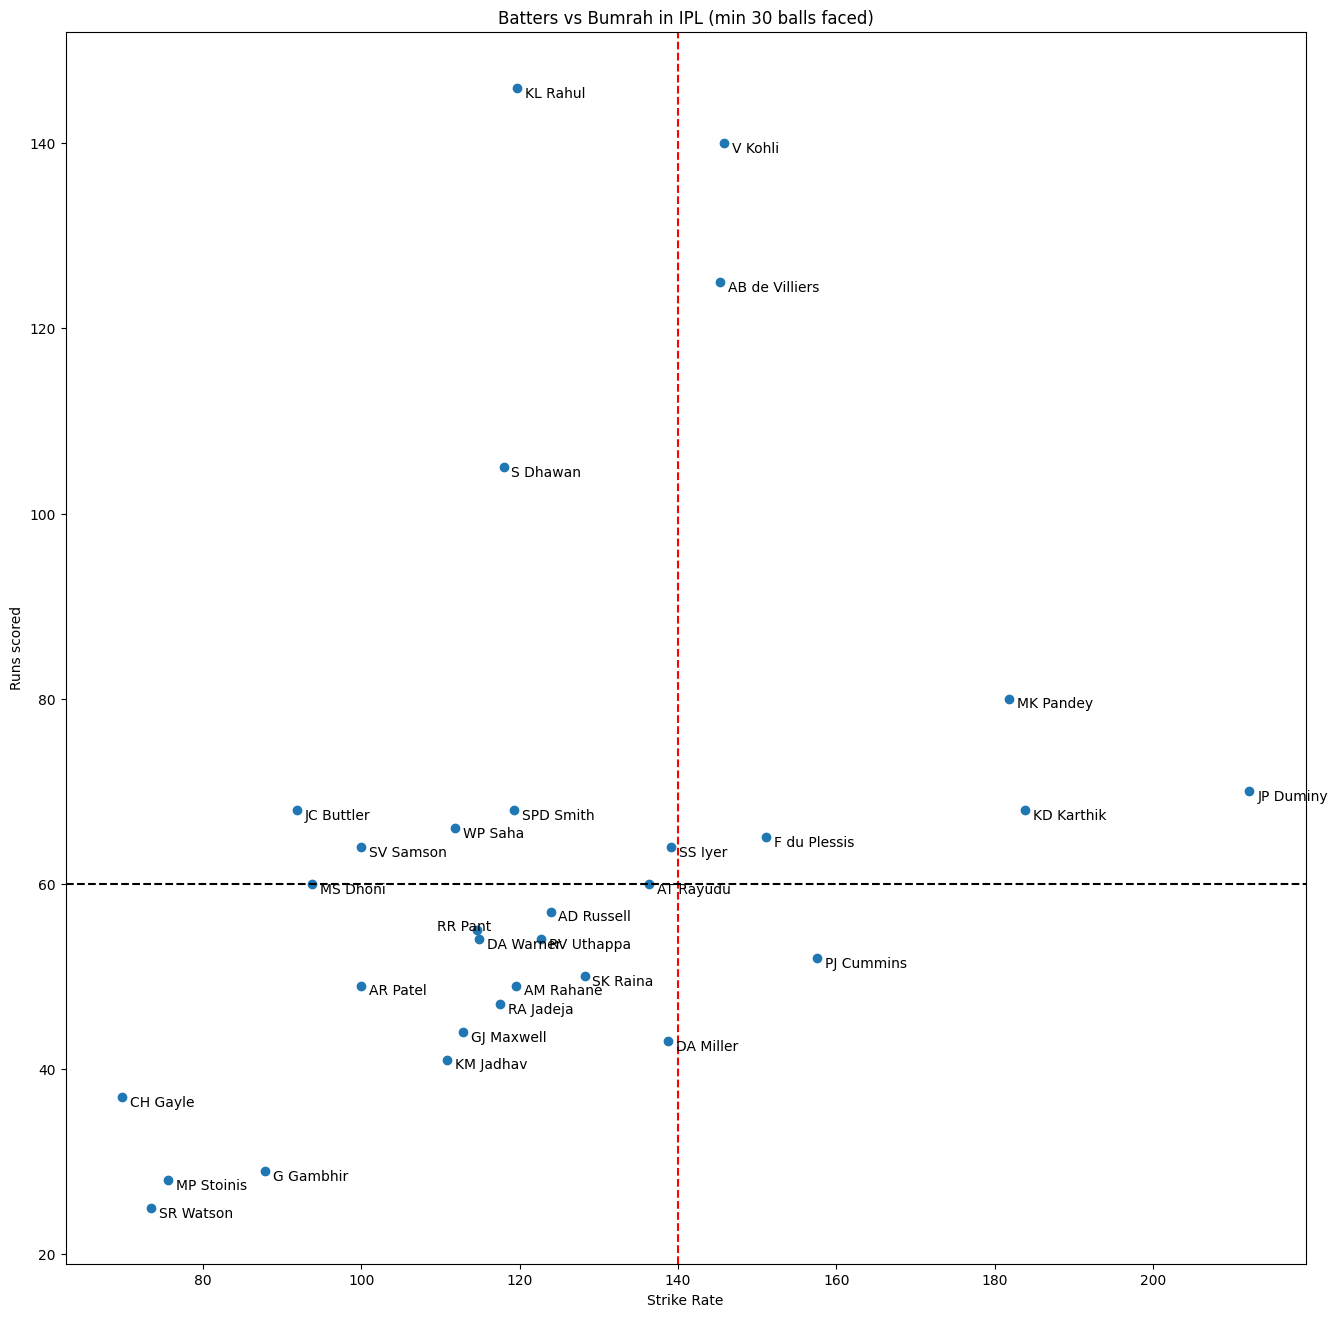

In [105]:
plt.figure(figsize=(16,16))

for i in range(len(bdf3)):
    if bdf3['batter'][i] == "RR Pant":
        plt.text(bdf3['Strike_Rate'][i] - 5, bdf3['batsman_runs'][i], bdf3['batter'][i])
    else:
        plt.text(bdf3['Strike_Rate'][i] + 1, bdf3['batsman_runs'][i] - 1, bdf3['batter'][i])

plt.axvline(140, ls='--', color='red')
plt.axhline(60, ls='--', color='black')

plt.title("Batters vs Bumrah in IPL (min 30 balls faced)")
plt.xlabel("Strike Rate")
plt.ylabel("Runs scored")
plt.scatter(bdf3.Strike_Rate, bdf3.batsman_runs)
plt.show()

In [106]:
kdf3.head()

,bowler,batsman_runs,ball,Strike_Rate
0,A Mishra,162,108,150.000000
1,A Nehra,60,57,105.263158
2,AB Dinda,36,30,120.000000
3,AD Russell,88,67,131.343284
4,AJ Tye,43,36,119.444444


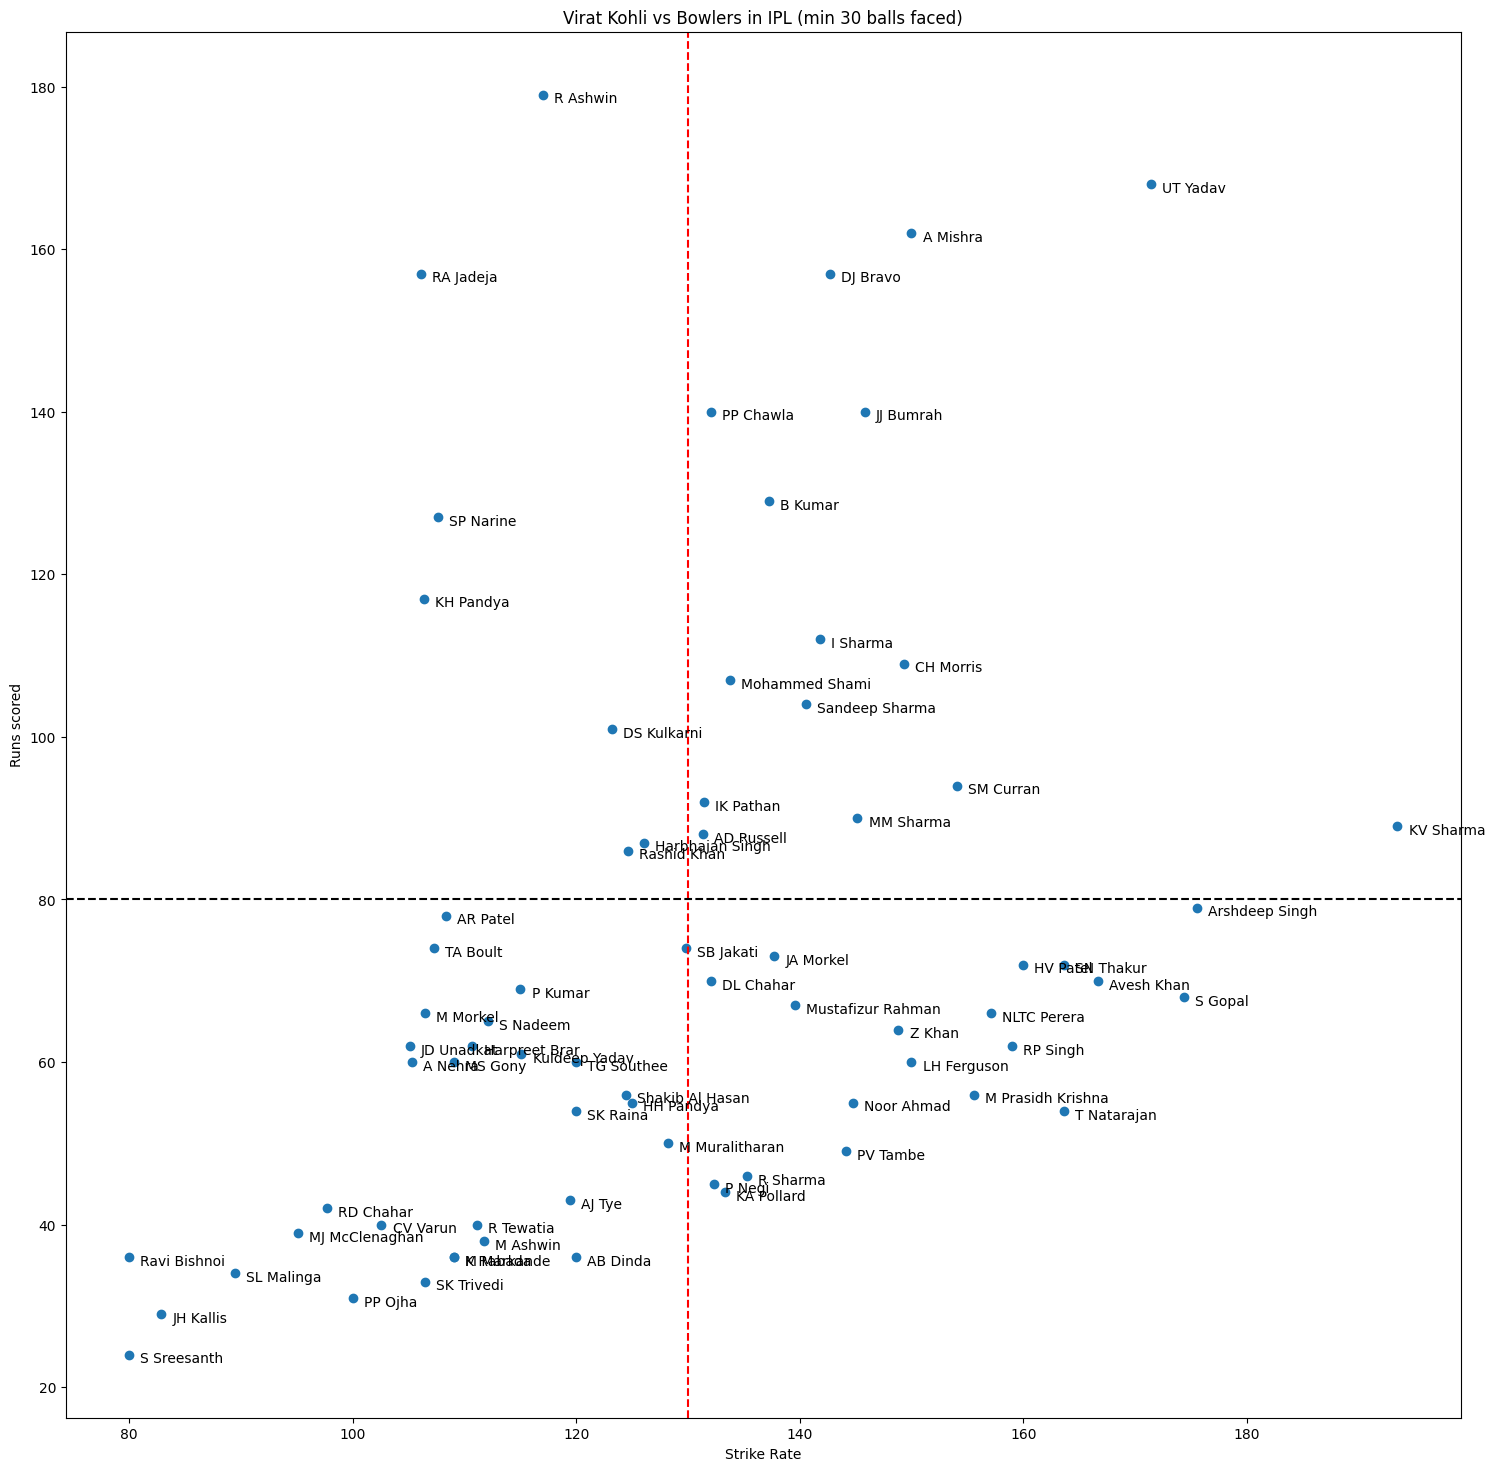

In [113]:
plt.figure(figsize=(18,18))

for i in range(len(kdf3)):
    plt.text(kdf3['Strike_Rate'][i] + 1, kdf3['batsman_runs'][i] - 1, kdf3['bowler'][i])

plt.axvline(130, ls='--', color='red')
plt.axhline(80, ls='--', color='black')

plt.title("Virat Kohli vs Bowlers in IPL (min 30 balls faced)")
plt.xlabel("Strike Rate")
plt.ylabel("Runs scored")
plt.scatter(kdf3.Strike_Rate, kdf3.batsman_runs)
plt.show()

In [ ]:
#